### User Feedback Preprocessing

In [62]:
import pandas as pd
import numpy as np

import copy


data = pd.read_csv('Dataset/CSV_USER_FEEDBACK_Prepro_2019Dec26_preprocessing.csv')
display(data.shape)
#display(data.head(5))

(4236, 32)

In [63]:
data = data.dropna()
display(data.shape)

(2448, 32)

In [64]:
# Save output of prepro to csv file
data.to_csv('temp_prepro.csv')

### CDF on only preproceseed dataset

In [65]:
import pandas as pd
import numpy as np

_df = pd.read_csv('Dataset/CSV_UFB_Prepro_200801_CDF.csv')
display(_df.head(5))
display(_df.shape)

,USER_ID
0,b058f43c-e2c3-4105-9c6a-d1bd49c3d5f8
1,b058f43c-e2c3-4105-9c6a-d1bd49c3d5f8
2,b058f43c-e2c3-4105-9c6a-d1bd49c3d5f8
3,77a801f9-152d-4aeb-aa04-cc3c67b974e6
4,967806a3-f2c5-4161-a6a5-f6dd8f1403ca


(2900, 1)

In [66]:
_df['FREQ'] = 1
_groupby_df = _df.groupby(['USER_ID']).count().reset_index()

display(_groupby_df.head(10))

,USER_ID,FREQ
0,025e04b0-196a-4dd0-9a9a-33b6fb8f19fd,4
1,07d91f23-46c8-4e43-9faf-0c9706c1644e,2
2,12048bbc-56ba-4070-9e40-abf32e1023c6,2
3,12116e97-7d56-4d5c-bbfa-b14379ebceb0,1
4,1802d1ed-3967-45a2-a29b-a5a0125b0ae5,299
5,1ebec2b6-b0c1-443a-a6e2-04ec79497784,2
6,1faa8e22-706c-409a-a13e-866b1c565105,3
7,25be5348-d4b9-40e0-8271-bdd88dc6bde1,248
8,26085c71-3a85-4ac0-8999-411dd70d478b,1
9,29e9f01b-1a8f-45d5-b16e-5725421c70ff,15


In [67]:
_groupby_df.to_csv('Dataset/CSV_UFB_Prepro_200801_CDF_GROUPBY.csv')

#### Calculate CDF and Plot it out

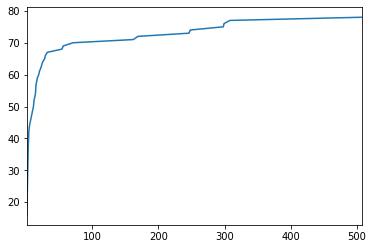

In [68]:
sorted_df = _groupby_df.copy()
sorted_df['value'] = _groupby_df['FREQ']
sorted_df['value'] = sorted_df['value'].sort_values()
series = pd.Series(sorted_df['value'].sort_values(), name = 'value')
cdf = series.value_counts().sort_index().cumsum()
cdf.plot()

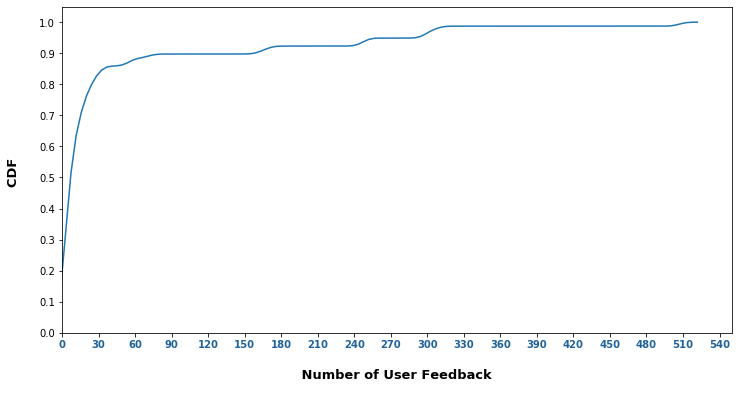

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline 

plt.figure(figsize=(12, 6))

ax = sns.kdeplot(series, cumulative=True, label="")

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

# Setting the X and Y Label
ax.set_xlabel('\n Number of User Feedback \n', fontdict=None, labelpad=None, fontsize=13, fontweight='bold')
ax.set_ylabel('CDF \n', fontdict=None, labelpad=None, fontsize=13, fontweight='bold')
#plt.xlabel('Number of User Feedback') 
#plt.ylabel('CDF')

axis_x = np.arange(0, 30, 550)
axes = ax.axes
# axes[0,0].set_xlim(-100,1000)
axes.set_xlim(0, 550)

# turn the axis label
for item in ax.get_xticklabels():
    item.set_size(10)
    item.set_weight("bold")
    item.set_rotation(0)
    item.set_color('#20639B')
    

# Save Image
plt.savefig('Dataset/Image/CDF_UFB_Prepro_Dataset.png')

### Plot CDF + cumulative histogram using Seaborn Python

In [18]:
data_all = pd.read_csv('Dataset/CSV_USER_FEEDBACK_Prepro_2019Dec26_preprocessing.csv')
display(data_all.shape)
display(data_all.head(1))

#kwargs = {'cumulative': True}
#sns.distplot(series, hist_kws=kwargs, kde_kws=kwargs)

(4236, 32)

,FEEDBACK_APP,FEEDBACK_VALUE,FEEDBACK_DATE,USER_ID,DATE,RTT,DOWNLOAD_LOSS_RATE,UPLOAD_LOSS_RATE,DOWNLOAD_JITTER,UPLOAD_JITTER,...,SIGNAL_STRENGTH_LEVEL(0),IS_IN_AIRPLANE_MODE,IS_MOBILE_DATA_ENABLED,IS_ROAMING_DATA_ENABLED,IS_IN_NATIONAL_ROAMING,IS_IN_ROAMING,IS_WIFI_CONNECTED,SIGNAL_STRENGTH_RSSI__dBm(1),SIGNAL_STRENGTH_LEVEL(1),WIFI_SSID
0,HANGOUTS___GENERAL___MOS,5,05:17.1,b058f43c-e2c3-4105-9c6a-d1bd49c3d5f8,05:09.3,1763210746,0.0,0.0,404856.44,975678.91,...,NaN,NaN,NaN,NaN,NaN,False,False,#NAME?,2.147484e+09,<unknown ssid>


In [19]:
data_all['FREQ'] = 1
_groupby_all = data_all.groupby(['USER_ID']).count().reset_index()

sorted_df = _groupby_all
sorted_df['value'] = _groupby_all['FREQ']
sorted_df['value'] = sorted_df['value'].sort_values()
series_all = pd.Series(sorted_df['value'].sort_values(), name = 'value')

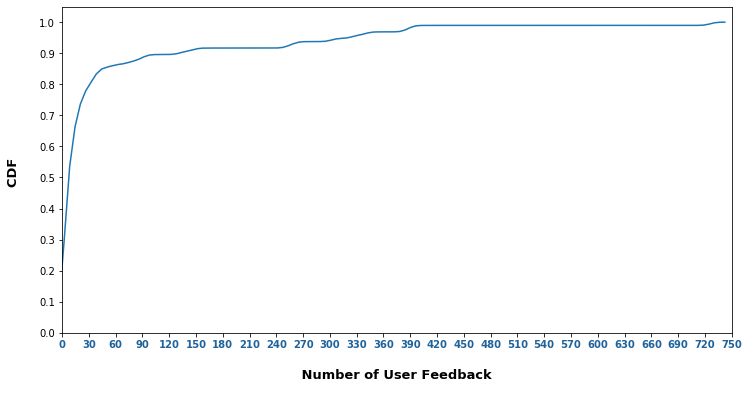

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline 

plt.figure(figsize=(12, 6))

ax = sns.kdeplot(series_all, cumulative=True, label="")

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

# Setting the X and Y Label
ax.set_xlabel('\n Number of User Feedback \n', fontdict=None, labelpad=None, fontsize=13, fontweight='bold')
ax.set_ylabel('CDF \n', fontdict=None, labelpad=None, fontsize=13, fontweight='bold')
#plt.xlabel('Number of User Feedback') 
#plt.ylabel('CDF')

axis_x = np.arange(0, 30, 750)
axes = ax.axes
# axes[0,0].set_xlim(-100,1000)
axes.set_xlim(0, 750)

# turn the axis label
for item in ax.get_xticklabels():
    item.set_size(10)
    item.set_weight("bold")
    item.set_rotation(0)
    item.set_color('#20639B')

### Filter By Number of comments less than 100

In [59]:
data_all['FREQ'] = 1
_groupby_filtered = data_all.groupby(['USER_ID']).count().reset_index()
data_filtered = _groupby_filtered[(_groupby_filtered.loc[:, 'FREQ']  <= 100)]

sorted_df = data_filtered.copy()
sorted_df['value'] = data_filtered.loc[:, 'FREQ']
sorted_df['value'] = sorted_df.loc[:, 'value'].sort_values()
series_filtered = pd.Series(sorted_df.loc[:, 'value'], name = 'value')

#display(series_filtered.tail(5))

# sorted_df = _groupby_all
# sorted_df['value'] = _groupby_all['FREQ']
# sorted_df['value'] = sorted_df['value'].sort_values()
# series_all = pd.Series(sorted_df['value'].sort_values(), name = 'value')

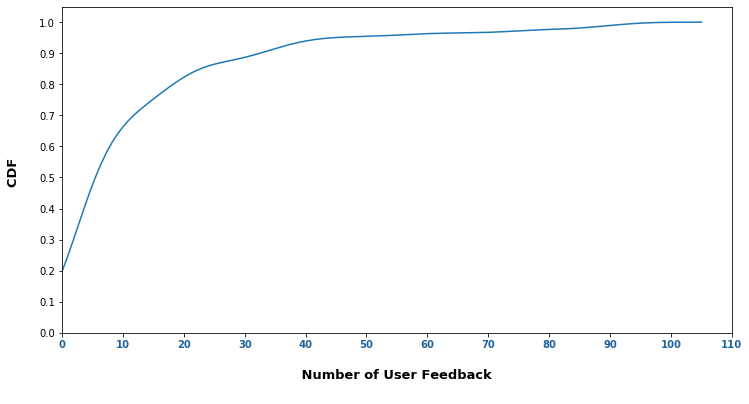

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline 

plt.figure(figsize=(12, 6))

ax = sns.kdeplot(series_filtered, cumulative=True, label="")

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

# Setting the X and Y Label
ax.set_xlabel('\n Number of User Feedback \n', fontdict=None, labelpad=None, fontsize=13, fontweight='bold')
ax.set_ylabel('CDF \n', fontdict=None, labelpad=None, fontsize=13, fontweight='bold')
#plt.xlabel('Number of User Feedback') 
#plt.ylabel('CDF')

axis_x = np.arange(0, 30, 750)
axes = ax.axes
# axes[0,0].set_xlim(-100,1000)
axes.set_xlim(0, 110)

# turn the axis label
for item in ax.get_xticklabels():
    item.set_size(10)
    item.set_weight("bold")
    item.set_rotation(0)
    item.set_color('#20639B')